# Exercises in statistics

# Q's for choosing the right test
- Is it categorical or numeric data?
- How big is your sample sizes?
- Are your data normally distributed?
- Do the groups have same distribution?
- How many groups are you comparing?
- (Note, we might still want to use a
non-parametric test if we have a
lot of data, but it is not normally
distributed)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [3]:
penguins_data = sns.load_dataset("penguins")
penguins_data.info()

# categorical: "species, island, sex"
# numerical:  "bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='species', ylabel='count'>

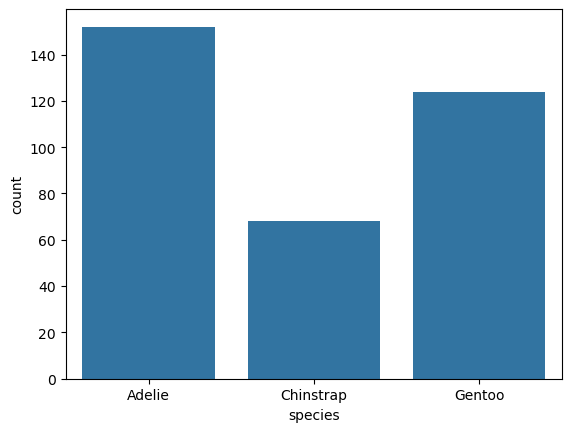

In [4]:
#1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
diff_spec = penguins_data['species']

sns.countplot(x= diff_spec)

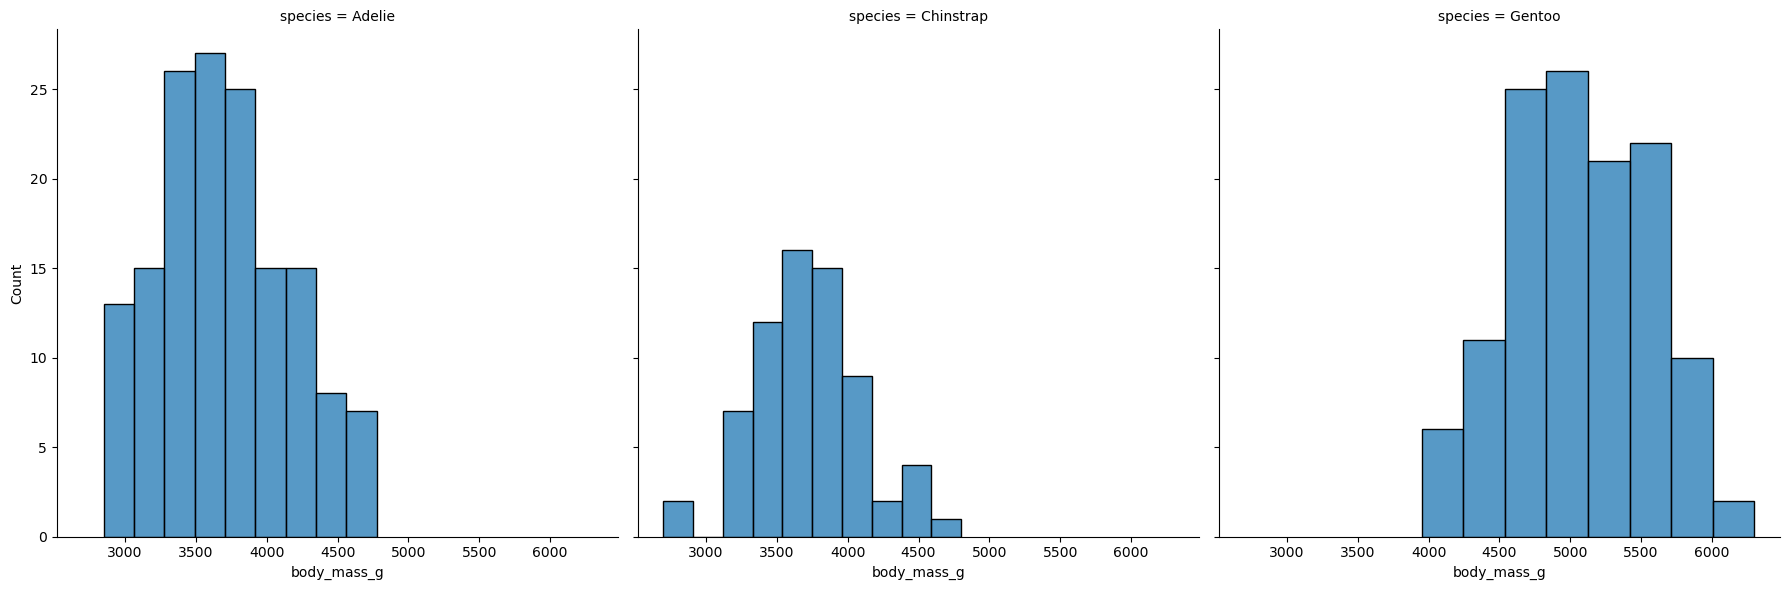

In [5]:
#2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
g = sns.FacetGrid(data=penguins_data, col="species", height= 6)
g.map(sns.histplot, 'body_mass_g')
plt.show()

#yes, they are normally distributed

In [6]:
#3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. 
# Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

#I will be picking the Student t Test, because:
# 1. I am seeking to compare, not summarize nor investigate relationship between the variables.
# 2. The independent variable we are seeking to investigate is weight (i.e continious as it is a Ratio)
# 3. I consider our sample size large.
# 4. I are comparing between 2 groups (Adelie and Chinstraps)
# 5. While they both are penguins, they are two seperate species and thus not part of the same group.

# Per the hint, we'll be dropping the n/a values.
diff_ad_ch= penguins_data.copy()
diff_ad_ch = penguins_data.dropna()


# The null hypothesis: There is no difference between in weight between Adelie and Chinstraps penguins. Significance level = 0.05.
# The alternate hypothesis: there is a difference between Adelie and Chinstraps.

stats.ttest_ind(diff_ad_ch[diff_ad_ch['species']=='Adelie']['body_mass_g'], diff_ad_ch[diff_ad_ch['species']=='Chinstrap']['body_mass_g'])
# The p-value is larger than the significance level, indicating there is a difference in weight between the two penguins. 


TtestResult(statistic=-0.42011219955863177, pvalue=0.6748289682757558, df=212.0)

In [7]:
#4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. 
# Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. 
# Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

# I will again be picking the "Student t Test", because:
# 1. Seeking comparison 
# 2. The independent variable we are seeking to investigate is weight
# 3. The sample size is still considered large.
# 4. I are comparing between 2 groups (this time Chinstraps and Gentoo penguins)
# 5. Still both penguins, and still seperate species. Not the same group.


# The null hypothesis: There is no difference between in weight between Chinstraps and Gentoo penguins. Significance level = 0.05.
# The alternate hypothesis: The difference between Chinstrap and Gentoo penguins will be larger than the one between Adelies and Chinstraps.
stats.ttest_ind(diff_ad_ch[diff_ad_ch['species']=='Chinstrap']['body_mass_g'], diff_ad_ch[diff_ad_ch['species']=='Gentoo']['body_mass_g'])

# The null hypothesis has been disproven, and the alternative hypothesis has been confirmed.



TtestResult(statistic=-19.33454832714746, pvalue=2.781745579785546e-46, df=185.0)

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [8]:
path = "data\\fb_like_and_share.csv"
fb = pd.read_csv(path, delimiter=';')
fb.head()

,type,likes_count_fb,shares_count_fb
0,video,577,7
1,photo,2802,23
2,video,490,14
3,link,535,16
4,photo,1049,44


In [9]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             32 non-null     object
 1   likes_count_fb   32 non-null     int64 
 2   shares_count_fb  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


In [10]:
#flexing my print to console skills and also displaying the overview of the categorical variable "type"
print(f'{fb['type'].describe()}')

count        32
unique        4
top       photo
freq         13
Name: type, dtype: object


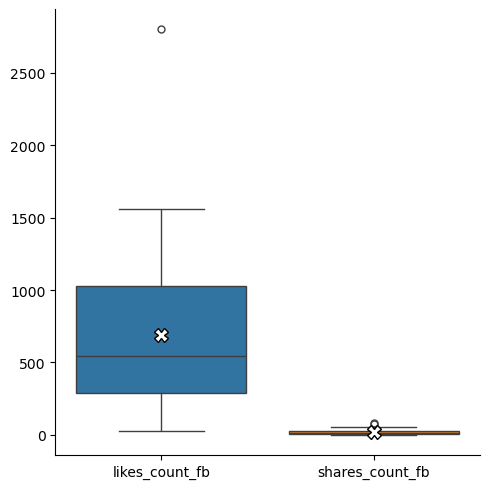

In [11]:
sns.catplot(data=fb, kind="box", 
            showmeans =True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

#clear to see there is a great discreptancy between shares and likes. Noticably there is few outliers.

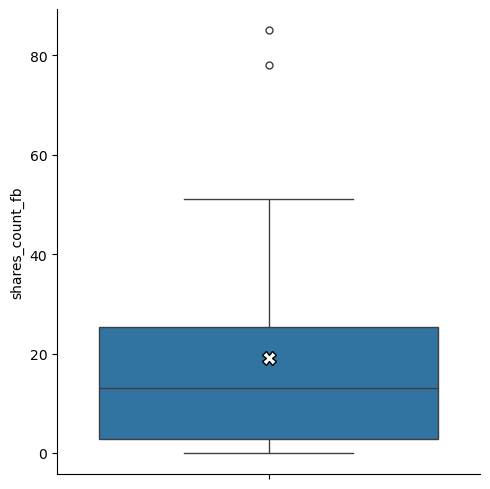

In [12]:
#lets zoom in on shares, because we are not able to see much about it from the view above.
sns.catplot(data=fb['shares_count_fb'], kind="box", 
            showmeans =True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

#Here we see a few in posts outliers in amount of shares, as well as the mean is slightly larger than the median of the shares.

# 1.1 Justification of chosen test for determination of difference in distrubtion of likes for video/photo 

In [ ]:
#1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
# To justify choice of test(s):
# 1. To start out - We are comparing between likes for photos and videos - So a comparison.
# 2. The type of data is Continuos as it is a count, which is a Ratio.
# 3. Whether or not I should select a Parametric or Non-Parametric test:
# 3.1 There is less than 15 for the two groups (photos and videos).
# 3.2 its quite difficult to see whether or not it is normally distributed.


# could use .normaltest
# https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_normaltest.html#hypothesis-normaltest

like_distribution = fb[fb['type'].isin(['video', 'photo'])]

like_distribution = like_distribution[['type','likes_count_fb']]
res = stats.normaltest(like_distribution['likes_count_fb'])
res.pvalue
#"The scipy.stats.normaltest function tests the null hypothesis that a sample comes from a normal distribution."
#this test shows the is a low probability that the data is normally distributed.

# 4. We don't perform a Kruskal-Wallis Test as that is for 3+ Non-parametic tests. This leaves us:
# 5. Signed-Rank and Mann-Whitney U Test! - We choose the Mann-Whitney U Test because, our two groups are different (i.e. Photos and videos)

0.0002980156653241424

# 1.2 The actual test for photos/videos

In [ ]:
# The null hypothesis: There is no difference between in likes between the categories photo and video. 
# Significance level = 0.05.
# The alternate hypothesis: There will be a strong certainty that here is a difference.

stats.mannwhitneyu(fb[fb['type']=='video']['likes_count_fb'], fb[fb['type']=='photo']['likes_count_fb'])
# The null hypothesis has been rejected, we conclude there is a statistically significant difference between the two types.



MannwhitneyuResult(statistic=26.0, pvalue=0.0326063047830172)

# 2.1 Justification of chosen test for determination of difference in distrubtion of shares for video/photo 

In [ ]:
#1. Is there a difference in the distribution of shares for photos and videos? Justify your choice of test(s).
# To justify choice of test(s):
# 1. To start out - We are still comparing between likes for photos and videos - So still a comparison.
# 2. Still a ratio as it still is count we are looking at. Thus still Continious.
# 3. Whether or not I should select a Parametric or Non-Parametric test:
# 3.1 There is less than 15 for the two groups (photos and videos).
# 3.2 lets just do the normal test again.

like_distribution = fb[fb['type'].isin(['video', 'photo'])]

like_distribution = like_distribution[['type','shares_count_fb']]
res = stats.normaltest(like_distribution['shares_count_fb'])
res.pvalue
# So even smaller probability we are working with a normally distributed data.



0.0025838331956452606

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time